# 뉴욕 두개짜리 방 에어비엔비 적당한 숙박료를 구하기
----------

    AB_NYC_2019.csv
    
    - 각 파일의 컬럼
    id
    name
    host_id
    host_name
    neighbourhood_group
    neighbourhood
    latitude
    longitude
    room_type
    price
    minimum_nights
    number_of_reviews
    last_review
    reviews_per_month
    calculated_host_listings_count
    availability_365


## Step 1. Preparation of Dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('AB_NYC_2019.csv')

In [51]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Step 2. Exploratory Data Analaysis

In [52]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [53]:
# 주석 만들기 : ctrl + /
df['neighbourhood_group'].value_counts()


neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [15]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum()

10052

<Axes: >

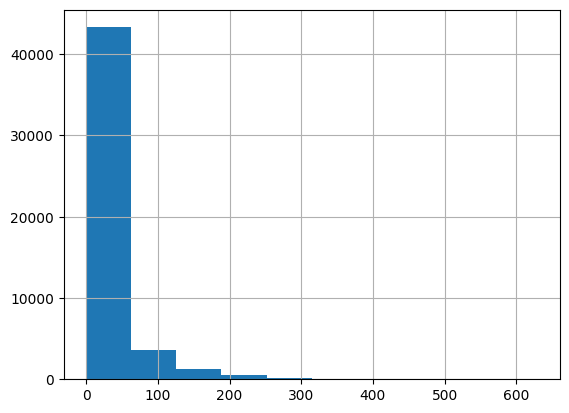

In [24]:
df['number_of_reviews'].hist()

<Axes: >

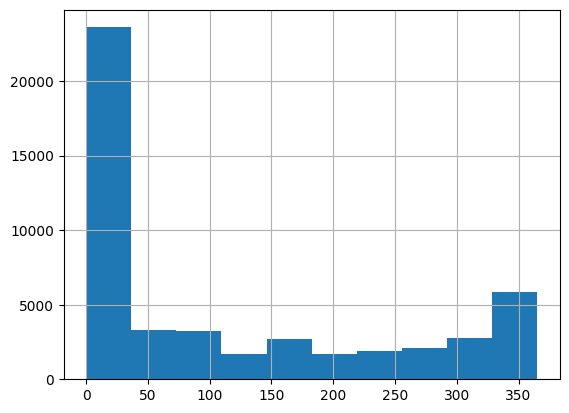

In [27]:
df['availability_365'].hist()

In [29]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [71]:
df.drop(['neighbourhood_group', 'neighbourhood'], axis=1, inplace=True)

In [72]:
df.head(
)

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,149,1,9,0.21,6,365
1,2845,225,1,45,0.38,2,355
2,4632,150,3,0,NaN,1,365
3,4869,89,1,270,4.64,1,194
4,7192,80,10,9,0.10,1,0


In [ ]:
df.drop('neighborhood_group')

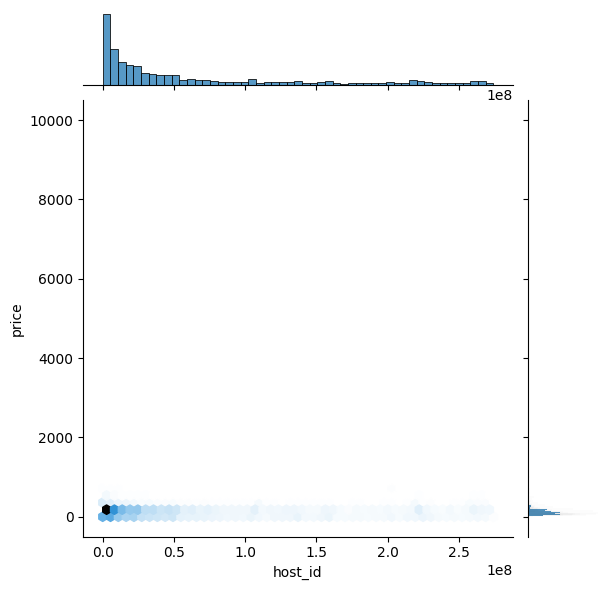

In [54]:
sns.jointplot(x='host_id', y='price', data=df, kind='hex')

<Axes: >

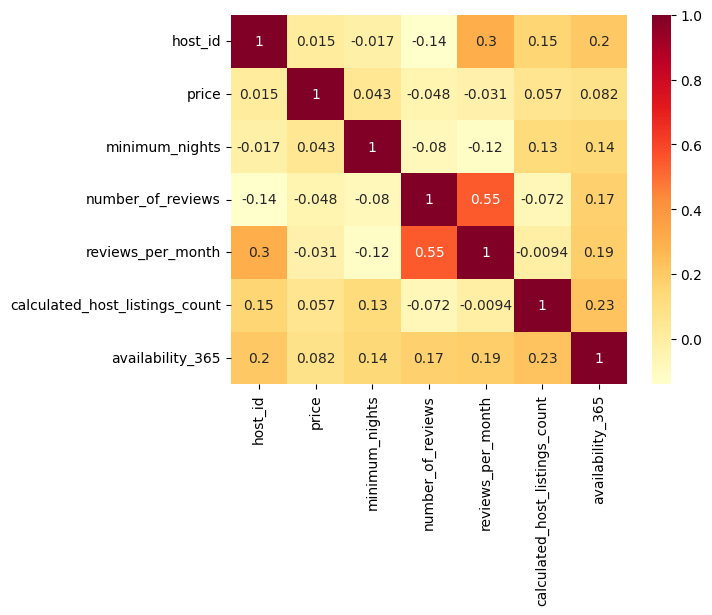

In [75]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

## Step 3. Data-Cleaning

 - 데이터에서 오류, 이상치, 누락된 값을 식별하고 수정

In [86]:
df= pd.read_csv('AB_NYC_2019.csv')

In [80]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [87]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [84]:

df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

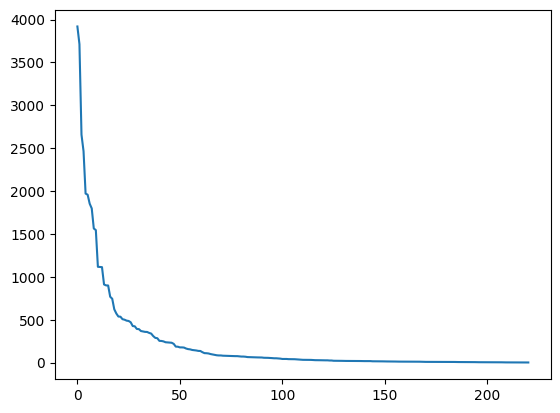

In [88]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [92]:
neighbourhood_processed = df['neighbourhood'].apply(lambda x: x if str(x) not in neigh[50:] else 'other')

In [94]:
neighbourhood_processed.value_counts()

neighbourhood
other                        6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426


<Axes: >

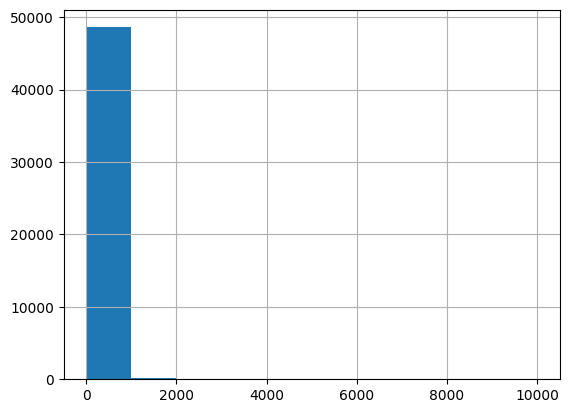

In [96]:
df['price'].hist()

In [104]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.00023)
print(p1, p2)

799.0 10.0


In [106]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

<Axes: >

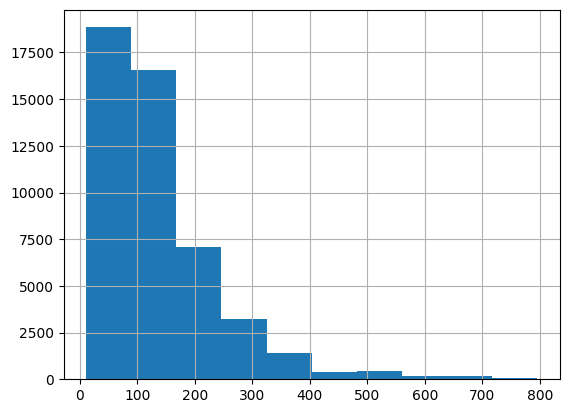

In [118]:
df['price'].hist()

In [121]:
df.isna().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9820
reviews_per_month                 9820
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [120]:
df.drop(['name'], axis=1, inplace=True)

In [124]:
df['last_review'] = df['last_review'].isna().apply(lambda x: 'no_data' if x is True else 'yes_data')

In [126]:
df['reviews_per_month'] = df['reviews_per_month'].isna().apply(lambda x: 'no_data' if x is True else 'yes_data')

In [128]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,other,Private room,149,1,9,yes_data,yes_data,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,yes_data,yes_data,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,yes_data,yes_data,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,yes_data,yes_data,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,yes_data,yes_data,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,yes_data,yes_data,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,yes_data,yes_data,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,yes_data,yes_data,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,yes_data,yes_data,6,2


In [129]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Step 4. Data-Preprocessing

- 데이터를 분석이나 모델학습에 적합한 형태로 가공

In [110]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48375 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         48375 non-null  int64 
 1   neighbourhood_group             48375 non-null  object
 2   neighbourhood                   48375 non-null  object
 3   room_type                       48375 non-null  object
 4   price                           48375 non-null  int64 
 5   minimum_nights                  48375 non-null  int64 
 6   number_of_reviews               48375 non-null  int64 
 7   last_review                     48375 non-null  object
 8   reviews_per_month               48375 non-null  object
 9   calculated_host_listings_count  48375 non-null  int64 
 10  availability_365                48375 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.4+ MB


In [142]:
# get_dummies 이용해 범주형 데이 전처리 
X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'reviews_per_month']]
X_cat = pd.get_dummies(X_cat)

In [132]:
from sklearn.preprocessing import StandardScaler

In [134]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [149]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,other,Private room,149,1,9,yes_data,yes_data,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,yes_data,yes_data,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,yes_data,yes_data,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,yes_data,yes_data,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,yes_data,yes_data,1,0


In [146]:
# StandScaler normalization : StandardScaler를 이용 수치형 데이터 표준ㅎ
scaler = StandardScaler()
x_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'last_review', 'reviews_per_month'], axis=1)

scaler.fit(x_num)
x_scaled = scaler.transform(x_num)
x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns=x_num.columns)

x = pd.concat([x_scaled, X_cat], axis=1)
y = df['price']

In [151]:
x.head()

,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,last_review_yes_data,reviews_per_month_yes_data
0,-0.859978,-0.294658,-0.322572,-0.035724,1.927928,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,True
1,-0.859977,-0.294658,0.482589,-0.156548,1.851716,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
2,-0.859954,-0.196135,-0.523863,-0.186755,1.927928,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,True
3,-0.859951,-0.294658,5.514851,-0.186755,0.624712,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,-0.859922,0.148696,-0.322572,-0.186755,-0.853789,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True


In [152]:
# 학습데이와 테스 데이 분리
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Step 5. Learning Model

In [155]:
from xgboost import XGBRegressor

In [157]:
#  XGBRegressor generation and learning 
model_reg = XGBRegressor()
model_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [159]:
# appraisal  of results
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [160]:
pred = model_reg.predict(x_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

45.80802166999343
74.63479053549159


In [ ]:
data = x_test
# 실제 3개 데이터에 대해 예측 가격 뽑기
pred2 = model_reg.predict(data[1:4])
print(pred2)
# 실제 데이터와 차이 비교
y_test2 = y_test[0:3]
print(pred2 - y_test)



## Step 6. Analysis of Model Performance


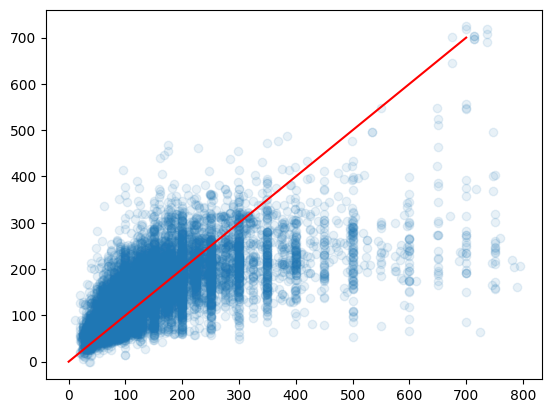

In [167]:
# 시각화
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0, 700], [0, 700], 'r-')

# feelings
- basic statistics

# TIL (Today I Learned)
- Data Frame 
- Data Cleaning from raw_data
- Data Interpretation and Methods
- Data visualization
- Learning Model based on scikit-learn
- Data Interpretation from learned model 